In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Q-Learning Algorithm

Q-learning, proposed by Watkins in 1989, is a popular model-free reinforcement learning algorithm that can be used to optimally solve **Markov decision processes (MDPs)**. It works by learning the **action-value function** to determine the value of taking a particular action in a certain state.

### Basic Q-Learning

Q-learning is an important model-free dynamic programming technique, allowing agents to learn to act optimally in Markovian domains without building domain maps. It updates the **Q-value** for each state-action pair based on the rewards obtained through interactions with the environment.

The Q-learning update rule is given by:

$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \left[ r_{t+1} + \gamma \max_{a} Q(s_{t+1}, a) - Q(s_t, a_t) \right]
$$

Where:

- $ s_t $: Current state
- $ a_t $: Action taken
- $ r_{t+1} $: Reward received after taking action $ a_t $
- $ s_{t+1} $: Next state
- $ \alpha $: Learning rate
- $ \gamma $: Discount factor
- $ \max_a Q(s_{t+1}, a) $: Maximum Q-value for the next state

### Algorithm Steps:

1. **Initialize Q-values**: Initialize $ Q(s, a) $ for all states $ s \in S $ and actions $ a \in A $ arbitrarily.
2. **For each episode**:
   - Observe the current state $ s_t $.
   - Choose an action $ a_t $ using a policy (e.g., epsilon-greedy).
   - Take the action $ a_t $, observe the next state $ s_{t+1} $ and the reward $ r_{t+1} $.
   - Update the Q-value for $ (s_t, a_t) $ using the update rule:
   $$
   Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \left[ r_{t+1} + \gamma \max_{a} Q(s_{t+1}, a) - Q(s_t, a_t) \right]
   $$
   - Set the next state as the current state $ s \leftarrow s_{t+1} $.
3. **Repeat** until the goal is achieved or the end of the episode.

### Sarsa vs. Q-learning

- **Sarsa (on-policy)**: Updates Q-values based on the action taken by the current policy:
  $$
  Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \left[ r_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t) \right]
  $$
  
- **Q-learning (off-policy)**: Uses the action with the maximum Q-value in the next state to update Q-values:
  $$
  Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \left[ r_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t) \right]
  $$

### Q-learning Update Rule

The Q-value update in Q-learning can be seen as a form of **stochastic approximation**:
$$
x_i = x_i + \alpha \left( F_i(x) - x_i + n_i \right)
$$

Where:
- $ x = [x_1, ..., x_n]^T \in \mathbb{R}^n $ is the state vector.
- $ F_i $ are functions mapping $ \mathbb{R}^n $ to $ \mathbb{R} $.
- $ n_i $ is a random noise term.
- $ \alpha $ is the step size.

### Q-Learning Algorithm

1. Initialize Q-values: Q(s, a) for all states s ∈ S and actions a ∈ A
2. Repeat (for each step of episode):
   a. Choose action a from state s based on Q and some exploration strategy (e.g., ε-greedy)
   b. Take action a, observe reward r, and next state s'
   c. a* ← arg max_a Q(s', a)
   d. δ ← r + γ Q(s', a*) − Q(s, a)
   e. Q(s, a) ← Q(s, a) + α δ
   f. s ← s'
3. Until the episode ends.


In [1]:
# Q-learning algorithm implementation

import random

# Define the environment (state-action space, reward, etc.)
class Environment:
    def __init__(self):
        self.states = [0, 1, 2, 3]  # Example states
        self.actions = [0, 1]  # Example actions: 0 = left, 1 = right
        self.rewards = {
            (0, 0): -1, (0, 1): 0,
            (1, 0): 0, (1, 1): 1,
            (2, 0): 1, (2, 1): -1,
            (3, 0): 0, (3, 1): 0
        }
    
    def step(self, state, action):
        # Simple environment transition: right action moves forward, left moves backward
        next_state = max(0, min(state + (1 if action == 1 else -1), len(self.states) - 1))
        reward = self.rewards.get((state, action), 0)
        return next_state, reward

# Q-learning algorithm
def q_learning(env, episodes=100, alpha=0.1, gamma=0.9, epsilon=0.1):
    # Initialize Q-table (states x actions) with zeros
    q_table = {state: {action: 0 for action in env.actions} for state in env.states}
    
    for episode in range(episodes):
        state = random.choice(env.states)  # Start from a random state

        while state != len(env.states) - 1:  # Run until terminal state is reached
            if random.uniform(0, 1) < epsilon:
                action = random.choice(env.actions)  # Exploration
            else:
                action = max(q_table[state], key=q_table[state].get)  # Exploitation

            next_state, reward = env.step(state, action)

            # Q-learning update rule
            max_future_q = max(q_table[next_state].values())  # max Q value for the next state
            q_table[state][action] += alpha * (reward + gamma * max_future_q - q_table[state][action])

            state = next_state  # Move to the next state

    return q_table

# Instantiate the environment
env = Environment()

# Run Q-learning
q_table = q_learning(env)

# Output the Q-table
for state, actions in q_table.items():
    print(f"State {state}: {actions}")


State 0: {0: 1.909763908959313, 1: 8.998664893240004}
State 1: {0: 8.057059136897786, 1: 9.999998909523608}
State 2: {0: 9.999998901542483, 1: -0.9995432240925493}
State 3: {0: 0, 1: 0}


Let us take the FrozenLake environment from OpenAI Gym as an example. Since the environment transitions are predefined in this case, we can simulate the environment and plot the reward vs. episodes and the Q-values.

Here's how you can implement it using a simple grid-like environment where the agent moves around a frozen lake, trying to avoid holes and reach the goal.

Since you prefer not to use any external libraries like Gym, we can simulate the environment manually. Let's implement a 4x4 grid FrozenLake environment and plot the results.

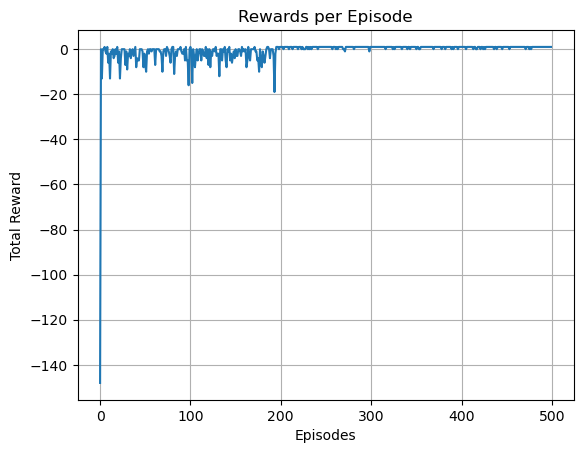

In [2]:
import random
import matplotlib.pyplot as plt

# FrozenLake-like 4x4 environment simulation
class FrozenLake:
    def __init__(self, size=4):
        self.size = size
        self.states = [(i, j) for i in range(size) for j in range(size)]
        self.actions = ['left', 'right', 'up', 'down']
        self.goal = (size - 1, size - 1)
        self.holes = [(1, 1), (1, 3), (2, 3), (3, 1)]  # holes positions
    
    def step(self, state, action):
        x, y = state
        
        # Movement logic based on action
        if action == 'left' and y > 0:
            y -= 1
        elif action == 'right' and y < self.size - 1:
            y += 1
        elif action == 'up' and x > 0:
            x -= 1
        elif action == 'down' and x < self.size - 1:
            x += 1
        
        next_state = (x, y)
        
        # Define rewards
        if next_state == self.goal:
            reward = 1
        elif next_state in self.holes:
            reward = -1
        else:
            reward = 0
        
        return next_state, reward

def q_learning(env, episodes=500, alpha=0.1, gamma=0.9, epsilon=0.1):
    q_table = {state: {action: 0 for action in env.actions} for state in env.states}
    rewards_per_episode = []

    for episode in range(episodes):
        state = random.choice(env.states)
        total_rewards = 0
        
        while state != env.goal:
            if random.uniform(0, 1) < epsilon:
                action = random.choice(env.actions)  # Exploration
            else:
                action = max(q_table[state], key=q_table[state].get)  # Exploitation
            
            next_state, reward = env.step(state, action)
            total_rewards += reward
            
            max_future_q = max(q_table[next_state].values())
            q_table[state][action] += alpha * (reward + gamma * max_future_q - q_table[state][action])
            state = next_state

        rewards_per_episode.append(total_rewards)

    return q_table, rewards_per_episode

# Plotting results
def plot_results(rewards):
    plt.plot(rewards)
    plt.title('Rewards per Episode')
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.grid(True)
    plt.show()

# Run Q-learning and plot results
env = FrozenLake()
q_table, rewards_per_episode = q_learning(env)
plot_results(rewards_per_episode)


## Double Q-Learning and Weighted Double Q-Learning

Q-learning can be used to optimally solve Markov decision processes (MDPs). However, in **stochastic MDPs**, its performance may suffer due to **overestimation** of action-values. To mitigate this overestimation, **Double Q-learning** was introduced in ealier works in MDP.

### Double Q-Learning Overview

Double Q-learning uses two sets of estimators, denoted by:
$$ \mu_A = \{ \mu_A^1, \mu_A^2, \dots, \mu_A^M \} \quad \text{and} \quad \mu_B = \{ \mu_B^1, \mu_B^2, \dots, \mu_B^M \}, $$

to estimate the **maximum expected value** of the Q-function for the next state:
$$ \max_a \mathbb{E}[Q(s', a')]. $$

These estimators are updated with different subsets of experience samples, where:
$$ S = S_A \cup S_B \quad \text{and} \quad S_A \cap S_B = \emptyset. $$

Both estimators are unbiased if the sample splitting is performed correctly, for instance, by random allocation.

### Problem Definition

Suppose we are given a set of random variables:
$$ X = \{x_1, x_2, \dots, x_M\}. $$

In many problems, we aim to find the **maximum expected value**:
$$ \max_i \mathbb{E}[x_i]. $$

However, this value is often approximated using sample-based approximations. If we denote $ S_i $ as the set of samples for $ x_i $, we can compute an unbiased estimator for $ \mathbb{E}[x_i] $ using the sample average:
$$ \mathbb{E}[\mu_i] \approx \mu_i(S) = \frac{1}{|S_i|} \sum_{s \in S_i} s, $$

where $ \mu_i $ is the mean estimator for variable $ x_i $.

## Double Q-Learning Algorithm

The Double Q-Learning algorithm (Algorithm) stores two Q-functions $ Q_A $ and $ Q_B $ and updates them using different subsets of experience. The actions are selected based on the average of the two Q-values and the **ε-greedy exploration** strategy. The algorithm updates one of the Q-functions using the values from the other.

### Algorithm Steps

1. **Initialize** the Q-functions $ Q_A $ and $ Q_B $ and the starting state $ s $.
2. **Repeat** the following steps:
    - Select an action $ a $ based on $ Q_A(s, \cdot) $ and $ Q_B(s, \cdot) $, for example using **ε-greedy** exploration based on $ Q_A + Q_B $.
    - Take action $ a $, observe reward $ r $ and next state $ s' $.
    - With 50% probability, choose to update either $ Q_A $ or $ Q_B $.
    - **If updating $ Q_A $:**
        - Compute $ a^* = \arg \max_a Q_A(s', a) $.
        - Update $ Q_A $ using:
          $$ \alpha_A(s, a) \leftarrow r + \gamma Q_B(s', a^*) - Q_A(s, a), $$
          $$ \delta_A \leftarrow r + \gamma Q_B(s', a^*) - Q_A(s, a), $$
          $$ Q_A(s, a) \leftarrow Q_A(s, a) + \alpha_A(s, a) \delta_A. $$
    - **Else, if updating $ Q_B $:**
        - Compute $ a^* = \arg \max_a Q_B(s', a) $.
        - Update $ Q_B $ using:
          $$ \alpha_B(s, a) \leftarrow r + \gamma Q_A(s', a^*) - Q_B(s, a), $$
          $$ \delta_B \leftarrow r + \gamma Q_A(s', a^*) - Q_B(s, a), $$
          $$ Q_B(s, a) \leftarrow Q_B(s, a) + \alpha_B(s, a) \delta_B. $$
3. **Terminate** when the end condition is met.

The algorithm outputs an approximation of the expected values $ \hat{x}_i $:
$$ \hat{x}_i \approx \mu_i(S) = \frac{1}{|S_i|} \sum_{s \in S_i} s. $$

Unlike regular Q-learning, Double Q-learning uses the value $ Q_B(s', a^*) $ instead of $ Q_A(s', a^*) $ to update $ Q_A $, which helps reduce overestimation in stochastic environments.



In [3]:
import random
import numpy as np

class DoubleQLearningAgent:
    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.99, epsilon=0.1):
        # Initialize the number of states and actions
        self.n_states = n_states
        self.n_actions = n_actions
        
        # Learning rate
        self.alpha = alpha
        # Discount factor
        self.gamma = gamma
        # Exploration rate for epsilon-greedy policy
        self.epsilon = epsilon
        
        # Initialize Q-tables for both Q_A and Q_B
        self.QA = np.zeros((n_states, n_actions))
        self.QB = np.zeros((n_states, n_actions))

    def choose_action(self, state):
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, self.n_actions - 1)
        else:
            return np.argmax(self.QA[state, :] + self.QB[state, :])

    def update(self, state, action, reward, next_state):
        # Choose with 0.5 probability whether to update QA or QB
        if random.uniform(0, 1) < 0.5:
            # Update QA
            a_star = np.argmax(self.QA[next_state, :])
            td_target = reward + self.gamma * self.QB[next_state, a_star]
            td_error = td_target - self.QA[state, action]
            self.QA[state, action] += self.alpha * td_error
        else:
            # Update QB
            a_star = np.argmax(self.QB[next_state, :])
            td_target = reward + self.gamma * self.QA[next_state, a_star]
            td_error = td_target - self.QB[state, action]
            self.QB[state, action] += self.alpha * td_error

# Dummy environment
class Environment:
    def __init__(self):
        self.n_states = 5  # Example: 5 states
        self.n_actions = 2  # Example: 2 possible actions per state
        self.state = 0

    def reset(self):
        self.state = 0
        return self.state

    def step(self, action):
        # Random transition and reward for simplicity
        next_state = (self.state + 1) % self.n_states
        reward = random.choice([0, 1])  # Random reward
        done = (next_state == 0)  # End of episode when we cycle back to state 0
        self.state = next_state
        return next_state, reward, done

# Training loop
n_episodes = 1000
env = Environment()
agent = DoubleQLearningAgent(n_states=env.n_states, n_actions=env.n_actions)

for episode in range(n_episodes):
    state = env.reset()
    done = False

    while not done:
        # Select an action
        action = agent.choose_action(state)
        # Take the action and observe the outcome
        next_state, reward, done = env.step(action)
        # Update the agent
        agent.update(state, action, reward, next_state)
        # Move to the next state
        state = next_state

# Display learned Q-values
print("QA table:")
print(agent.QA)
print("\nQB table:")
print(agent.QB)


QA table:
[[18.79280918 12.90351605]
 [15.41278473 19.208067  ]
 [19.23695748 13.98850998]
 [18.81543075 13.37036518]
 [19.03323401 13.58196916]]

QB table:
[[19.16200948 12.65219391]
 [14.57226152 18.94808893]
 [19.10714827 11.64449558]
 [19.02449782 15.23748759]
 [18.74143811 15.83335815]]


# Double Q-Learning in a Custom Frozen Lake Environment

In this notebook, we will implement **Double Q-Learning** in a manually constructed **Frozen Lake** environment.

## 1. Environment Setup

We simulate a Frozen Lake grid environment where the agent must move from the start (`S`) to the goal (`G`). The grid includes:
- Frozen tiles (`F`) on which the agent can move safely.
- Holes (`H`) which cause the agent to lose if it steps on them.

The grid can be represented as:

$$
\begin{bmatrix}
S & F & F & F \\
F & H & F & H \\
F & F & F & H \\
H & F & F & G
\end{bmatrix}
$$

The goal is to learn the best policy using **Double Q-Learning**.

## 2. Double Q-Learning

In **Double Q-Learning**, two Q-tables $( Q_A $ and $ Q_B $) are maintained. Each time the agent performs an action, only one of these tables is updated based on a random decision. This helps mitigate the issue of **overestimation** in standard Q-learning.

### Algorithm:

$$
Q_A(s, a) = Q_A(s, a) + \alpha \left( r + \gamma Q_B(s', a^*) - Q_A(s, a) \right)
$$

Where:
- $ Q_A(s, a) $ is the current value of action $ a $ at state $ s $ in table $ A $,
- $ r $ is the immediate reward,
- $ \gamma $ is the discount factor,
- $ Q_B(s', a^*) $ is the Q-value from table $ B $ for the next state $ s' $ and the best action $ a^* $.

Similarly, when updating $ Q_B $:

$$
Q_B(s, a) = Q_B(s, a) + \alpha \left( r + \gamma Q_A(s', a^*) - Q_B(s, a) \right)
$$

### Exploration vs. Exploitation:
To balance **exploration** and **exploitation**, the agent selects an action using an $ \epsilon $-greedy policy:

$$
\text{Action}(s) = \begin{cases} 
\text{Random Action}, & \text{with probability } \epsilon \\
\arg\max_a \left( Q_A(s, a) + Q_B(s, a) \right), & \text{otherwise}
\end{cases}
$$

### Hyperparameters:
- Learning rate $ \alpha = 0.1 $
- Discount factor $ \gamma = 0.99 $
- Exploration rate $ \epsilon = 0.1 $

## 3. Training Procedure

The agent interacts with the environment over multiple episodes. At each time step, it:
1. Chooses an action based on the $ \epsilon $-greedy policy.
2. Takes the action, receives the reward, and moves to the next state.
3. Updates either $ Q_A $ or $ Q_B $ based on a random decision.
4. Repeats this process until the episode ends.

## 4. Visualizing Q-values

After training, we can visualize the learned $ Q_A $ and $ Q_B $ tables to understand the agent's knowledge of the environment.

$$
Q_A = \begin{bmatrix}
q_{A_{11}} & q_{A_{12}} & \cdots & q_{A_{14}} \\
q_{A_{21}} & q_{A_{22}} & \cdots & q_{A_{24}} \\
\vdots     & \vdots     & \ddots & \vdots \\
q_{A_{41}} & q_{A_{42}} & \cdots & q_{A_{44}}
\end{bmatrix}
$$

Similarly for $ Q_B $.

## 5. Conclusion

Double Q-Learning helps reduce the overestimation problem in traditional Q-Learning by using two separate Q-tables and switching between them during updates. This simple environment allows us to experiment with this algorithm and observe how it improves the agent's learning process.


In [6]:
import random
import numpy as np

class DoubleQLearningAgent:
    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.99, epsilon=0.1):
        # Initialize the number of states and actions
        self.n_states = n_states
        self.n_actions = n_actions
        
        # Learning rate
        self.alpha = alpha
        # Discount factor
        self.gamma = gamma
        # Exploration rate for epsilon-greedy policy
        self.epsilon = epsilon
        
        # Initialize Q-tables for both Q_A and Q_B
        self.QA = np.zeros((n_states, n_actions))
        self.QB = np.zeros((n_states, n_actions))

    def choose_action(self, state):
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, self.n_actions - 1)
        else:
            return np.argmax(self.QA[state, :] + self.QB[state, :])

    def update(self, state, action, reward, next_state):
        # Choose with 0.5 probability whether to update QA or QB
        if random.uniform(0, 1) < 0.5:
            # Update QA
            a_star = np.argmax(self.QA[next_state, :])
            td_target = reward + self.gamma * self.QB[next_state, a_star]
            td_error = td_target - self.QA[state, action]
            self.QA[state, action] += self.alpha * td_error
        else:
            # Update QB
            a_star = np.argmax(self.QB[next_state, :])
            td_target = reward + self.gamma * self.QA[next_state, a_star]
            td_error = td_target - self.QB[state, action]
            self.QB[state, action] += self.alpha * td_error

# Dummy environment
class Environment:
    def __init__(self):
        self.n_states = 5  # Example: 5 states
        self.n_actions = 2  # Example: 2 possible actions per state
        self.state = 0

    def reset(self):
        self.state = 0
        return self.state

    def step(self, action):
        # Random transition and reward for simplicity
        next_state = (self.state + 1) % self.n_states
        reward = random.choice([0, 1])  # Random reward
        done = (next_state == 0)  # End of episode when we cycle back to state 0
        self.state = next_state
        return next_state, reward, done

# Training loop
n_episodes = 1000
env = Environment()
agent = DoubleQLearningAgent(n_states=env.n_states, n_actions=env.n_actions)

for episode in range(n_episodes):
    state = env.reset()
    done = False

    while not done:
        # Select an action
        action = agent.choose_action(state)
        # Take the action and observe the outcome
        next_state, reward, done = env.step(action)
        # Update the agent
        agent.update(state, action, reward, next_state)
        # Move to the next state
        state = next_state

# Display learned Q-values
print("QA table:")
print(agent.QA)
print("\nQB table:")
print(agent.QB)
# # Simple textual progress visualization
# for i in range(0, n_episodes, 100):
#     print(f"Episode {i}: Total Reward = {sum(rewards[i:i+100])}")


QA table:
[[18.88905163 12.81093909]
 [19.24719863 12.3856036 ]
 [19.39446878 12.93299777]
 [18.79897921 14.30140858]
 [19.42424137 15.15815444]]

QB table:
[[19.13937294 12.3444787 ]
 [19.25670357 11.79841763]
 [19.19864161 11.60048604]
 [19.37186253  9.89649803]
 [18.85743829 14.73198277]]


In [7]:
# Custom Frozen Lake Environment

class FrozenLakeEnv:
    def __init__(self):
        self.grid = [
            ['S', 'F', 'F', 'F'],
            ['F', 'H', 'F', 'H'],
            ['F', 'F', 'F', 'H'],
            ['H', 'F', 'F', 'G']
        ]
        self.state = (0, 0)  # Start position
        self.goal = (3, 3)
        self.holes = [(1, 1), (1, 3), (3, 0), (3, 1)]
        self.actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # right, down, left, up

    def reset(self):
        self.state = (0, 0)  # Reset to start
        return self.state

    def step(self, action):
        # Calculate new position
        new_state = (self.state[0] + self.actions[action][0], 
                     self.state[1] + self.actions[action][1])
        
        # Check boundaries
        if new_state[0] < 0 or new_state[0] > 3 or new_state[1] < 0 or new_state[1] > 3:
            new_state = self.state  # Invalid move, stay in place

        # Update state and check for rewards
        self.state = new_state
        if self.state in self.holes:
            return self.state, -1, True  # Fell into a hole
        elif self.state == self.goal:
            return self.state, 1, True  # Reached the goal
        return self.state, 0, False  # Normal move

# Double Q-Learning Agent
class DoubleQLearningAgent:
    def __init__(self, env):
        self.env = env
        self.Q_A = [[0] * len(env.actions) for _ in range(16)]  # 4x4 grid = 16 states
        self.Q_B = [[0] * len(env.actions) for _ in range(16)]
        self.alpha = 0.1
        self.gamma = 0.99
        self.epsilon = 0.1
        self.episodes = 1000

    def state_to_index(self, state):
        return state[0] * 4 + state[1]  # Convert (x, y) to index

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(len(self.env.actions))  # Explore
        index = self.state_to_index(state)
        return np.argmax([self.Q_A[index][a] + self.Q_B[index][a] for a in range(len(self.env.actions))])  # Exploit

    def update_Q(self, state, action, reward, next_state, update_A=True):
        index = self.state_to_index(state)
        next_index = self.state_to_index(next_state)
        a_star = np.argmax(self.Q_B[next_index]) if update_A else np.argmax(self.Q_A[next_index])
        
        if update_A:
            self.Q_A[index][action] += self.alpha * (reward + self.gamma * self.Q_B[next_index][a_star] - self.Q_A[index][action])
        else:
            self.Q_B[index][action] += self.alpha * (reward + self.gamma * self.Q_A[next_index][a_star] - self.Q_B[index][action])

    def train(self):
        rewards_per_episode = []
        for episode in range(self.episodes):
            state = self.env.reset()
            total_reward = 0
            done = False

            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                total_reward += reward
                
                if np.random.rand() < 0.5:
                    self.update_Q(state, action, reward, next_state, update_A=True)
                else:
                    self.update_Q(state, action, reward, next_state, update_A=False)

                state = next_state
            
            rewards_per_episode.append(total_reward)
        
        return rewards_per_episode

# Training the agent
env = FrozenLakeEnv()
agent = DoubleQLearningAgent(env)
rewards = agent.train()

# Basic ASCII Plotting of Rewards
def plot_rewards(rewards):
    max_reward = max(rewards)
    min_reward = min(rewards)
    for i in range(len(rewards)):
        bar_length = int((rewards[i] - min_reward) / (max_reward - min_reward + 1e-9) * 50)  # Scale to 50 characters
        print(f"Episode {i + 1}: " + "#" * bar_length)

# Visualizing the performance
plot_rewards(rewards)


Episode 1: 
Episode 2: 
Episode 3: 
Episode 4: 
Episode 5: 
Episode 6: 
Episode 7: 
Episode 8: 
Episode 9: 
Episode 10: 
Episode 11: 
Episode 12: 
Episode 13: 
Episode 14: 
Episode 15: 
Episode 16: 
Episode 17: 
Episode 18: 
Episode 19: 
Episode 20: 
Episode 21: 
Episode 22: 
Episode 23: 
Episode 24: 
Episode 25: 
Episode 26: 
Episode 27: 
Episode 28: 
Episode 29: 
Episode 30: 
Episode 31: 
Episode 32: 
Episode 33: 
Episode 34: 
Episode 35: 
Episode 36: 
Episode 37: 
Episode 38: 
Episode 39: 
Episode 40: 
Episode 41: 
Episode 42: 
Episode 43: 
Episode 44: 
Episode 45: 
Episode 46: 
Episode 47: 
Episode 48: 
Episode 49: 
Episode 50: 
Episode 51: 
Episode 52: 
Episode 53: #################################################
Episode 54: 
Episode 55: 
Episode 56: #################################################
Episode 57: 
Episode 58: 
Episode 59: 
Episode 60: 
Episode 61: 
Episode 62: 
Episode 63: 
Episode 64: 
Episode 65: 
Episode 66: 
Episode 67: 
Episode 68: 
Episode 69: 
Episode 70: 
E

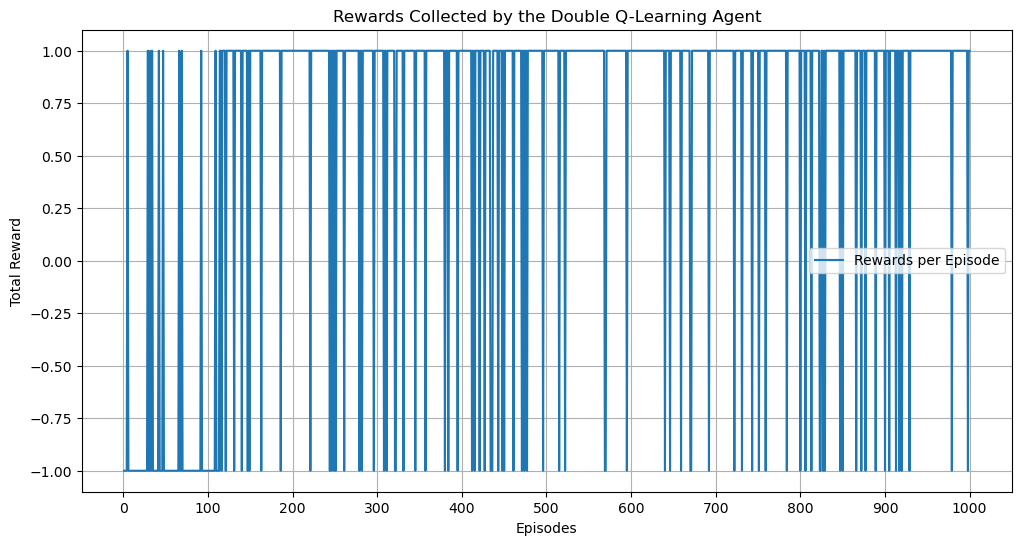

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Custom Frozen Lake Environment
class FrozenLakeEnv:
    def __init__(self):
        self.grid = [
            ['S', 'F', 'F', 'F'],
            ['F', 'H', 'F', 'H'],
            ['F', 'F', 'F', 'H'],
            ['H', 'F', 'F', 'G']
        ]
        self.state = (0, 0)  # Start position
        self.goal = (3, 3)
        self.holes = [(1, 1), (1, 3), (3, 0), (3, 1)]
        self.actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # right, down, left, up

    def reset(self):
        self.state = (0, 0)  # Reset to start
        return self.state

    def step(self, action):
        # Calculate new position
        new_state = (self.state[0] + self.actions[action][0], 
                     self.state[1] + self.actions[action][1])
        
        # Check boundaries
        if new_state[0] < 0 or new_state[0] > 3 or new_state[1] < 0 or new_state[1] > 3:
            new_state = self.state  # Invalid move, stay in place

        # Update state and check for rewards
        self.state = new_state
        if self.state in self.holes:
            return self.state, -1, True  # Fell into a hole
        elif self.state == self.goal:
            return self.state, 1, True  # Reached the goal
        return self.state, 0, False  # Normal move

# Double Q-Learning Agent
class DoubleQLearningAgent:
    def __init__(self, env):
        self.env = env
        self.Q_A = [[0] * len(env.actions) for _ in range(16)]  # 4x4 grid = 16 states
        self.Q_B = [[0] * len(env.actions) for _ in range(16)]
        self.alpha = 0.1
        self.gamma = 0.99
        self.epsilon = 0.1
        self.episodes = 1000

    def state_to_index(self, state):
        return state[0] * 4 + state[1]  # Convert (x, y) to index

    def choose_action(self, state):
        if random.random() < self.epsilon:
            return random.choice(range(len(self.env.actions)))  # Explore
        index = self.state_to_index(state)
        return self.argmax([self.Q_A[index][a] + self.Q_B[index][a] for a in range(len(self.env.actions))])  # Exploit

    def argmax(self, lst):
        max_value = max(lst)
        return lst.index(max_value)  # Returns the first index of the maximum value

    def update_Q(self, state, action, reward, next_state, update_A=True):
        index = self.state_to_index(state)
        next_index = self.state_to_index(next_state)
        a_star = self.argmax(self.Q_B[next_index]) if update_A else self.argmax(self.Q_A[next_index])
        
        if update_A:
            self.Q_A[index][action] += self.alpha * (reward + self.gamma * self.Q_B[next_index][a_star] - self.Q_A[index][action])
        else:
            self.Q_B[index][action] += self.alpha * (reward + self.gamma * self.Q_A[next_index][a_star] - self.Q_B[index][action])

    def train(self):
        rewards_per_episode = []
        for episode in range(self.episodes):
            state = self.env.reset()
            total_reward = 0
            done = False

            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                total_reward += reward
                
                if random.random() < 0.5:
                    self.update_Q(state, action, reward, next_state, update_A=True)
                else:
                    self.update_Q(state, action, reward, next_state, update_A=False)

                state = next_state
            
            rewards_per_episode.append(total_reward)
        
        return rewards_per_episode

# Training the agent
env = FrozenLakeEnv()
agent = DoubleQLearningAgent(env)
rewards = agent.train()

# Plotting the results using Matplotlib and Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, len(rewards) + 1), y=rewards, label='Rewards per Episode')
plt.title('Rewards Collected by the Double Q-Learning Agent')
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.xticks(range(0, agent.episodes + 1, 100))
plt.grid()
plt.legend()
plt.show()


# Weighted Double Q-Learning

Weighted Double Q-Learning [296] combines Q-learning and double Q-learning to address the issues of overestimation in Q-learning and underestimation in double Q-learning. 

## Algorithm 6.40: Weighted Double Q-Learning

\begin{algorithm}[H]
\caption{Weighted Double Q-Learning}
\begin{algorithmic}[1]
\State \textbf{input:} $X = \{x_1, \ldots, x_M\}$
\State initialize $Q_A$, $Q_B$, $s$
\Repeat
    \State Choose $a$ from $s$ based on $Q_A$ and $Q_B$ (e.g., $\epsilon$-greedy in $Q_A + Q_B$)
    \State Take action $a$, observe $r$, $s'$
    \State With 0.5 probability, choose whether to update $Q_A$ or $Q_B$
    \If{chose to update $Q_A$}
        \State $a^* \gets \arg\max_a Q_A(s', a)$
        \State $a_L \gets \arg\min_a Q_A(s', a) \left| Q_B(s', a^*) - Q_B(s', a_L) \right|$
        \State $\beta_A \gets c + \left| Q_B(s', a^*) - Q_B(s', a_L) \right|$
        \State $\delta_A \gets r + \gamma \left[ \beta_A Q_A(s', a^*) + (1 - \beta_A) Q_B(s, a) \right] - Q_A(s, a)$
        \State $Q_A(s, a) \gets Q_A(s, a) + \alpha_A(s, a) \delta_A$
    \ElsIf{chose to update $Q_B$}
        \State $a^* \gets \arg\max_a Q_B(s', a)$
        \State $a_L \gets \arg\min_a Q_B(s', a) \left| Q_A(s', a^*) - Q_A(s', a_L) \right|$
        \State $\beta_B \gets c + \left| Q_A(s', a^*) - Q_A(s', a_L) \right|$
        \State $\delta_B \gets r + \gamma \left[ \beta_B Q_B(s', a^*) + (1 - \beta_B) Q_A(s', a^*) \right] - Q_B(s, a)$
        \State $Q_B(s, a) \gets Q_B(s, a) + \alpha_B(s, a) \delta_B$
    \EndIf
    \State $s \gets s'$
\Until end
\State \textbf{output:} $\hat{x}_i \approx \mu_i(S) = \frac{1}{|S_{1i}|} \sum_{s \in S_i} s$
\end{algorithmic}
\end{algorithm}

## Comparison Among Q-learning, Double Q-learning, and Weighted Double Q-learning

1. **Q-learning**: 
   - Utilizes a single estimator for $Q(s, a)$.

2. **Double Q-learning**: 
   - Employs two estimators for both $Q_A(s, a)$ and $Q_B(s, a)$.

3. **Weighted Double Q-learning**: 
   - Implements a weighted double estimator for both $Q_A(s, a)$ and $Q_B(s, a)$.

## Key Differences Between Algorithms

- **Weighted Update**: 
  - Algorithm 6.40 replaces $Q_B(s', a^*)$ with the weighted term $\beta_A Q_A(s', a^*) + (1 - \beta_A) Q_B(s', a^*)$ when updating $\delta_A$.
  
- **Weighted Update**: 
  - Algorithm 6.40 replaces $Q_A(s', a^*)$ with the weighted term $\beta_B Q_B(s', a^*) + (1 - \beta_B) Q_A(s', a^*)$ when updating $\delta_B$.

These changes result in the method being termed "weighted double Q-learning."


# Weighted Double Q-Learning

Weighted Double Q-Learning [296] combines Q-learning and double Q-learning to address the issues of overestimation in Q-learning and underestimation in double Q-learning. 

## Algorithm : Weighted Double Q-Learning


$$
\begin{array}{l}
\textbf{input:} \; X = \{x_1, \ldots, x_M\} \\
\text{initialize } Q_A, Q_B, s \\
\text{repeat} \\
\quad \text{Choose } a \text{ from } s \text{ based on } Q_A \text{ and } Q_B \text{ (e.g., } \epsilon\text{-greedy in } Q_A + Q_B) \\
\quad \text{Take action } a, \text{ observe } r, s' \\
\quad \text{With probability } 0.5, \text{ choose whether to update } Q_A \text{ or } Q_B \\
\quad \text{if update } Q_A \text{ then} \\
\quad \quad a^* \gets \arg\max_a Q_A(s', a) \\
\quad \quad a_L \gets \arg\min_a Q_A(s', a) \left| Q_B(s', a^*) - Q_B(s', a_L) \right| \\
\quad \quad \beta_A \gets c + \left| Q_B(s', a^*) - Q_B(s', a_L) \right| \\
\quad \quad \delta_A \gets r + \gamma \left[ \beta_A Q_A(s', a^*) + (1 - \beta_A) Q_B(s, a) \right] - Q_A(s, a) \\
\quad \quad Q_A(s, a) \gets Q_A(s, a) + \alpha_A(s, a) \delta_A \\
\quad \text{else if update } Q_B \text{ then} \\
\quad \quad a^* \gets \arg\max_a Q_B(s', a) \\
\quad \quad a_L \gets \arg\min_a Q_B(s', a) \left| Q_A(s', a^*) - Q_A(s', a_L) \right| \\
\quad \quad \beta_B \gets c + \left| Q_A(s', a^*) - Q_A(s', a_L) \right| \\
\quad \quad \delta_B \gets r + \gamma \left[ \beta_B Q_B(s', a^*) + (1 - \beta_B) Q_A(s', a^*) \right] - Q_B(s, a) \\
\quad \quad Q_B(s, a) \gets Q_B(s, a) + \alpha_B(s, a) \delta_B \\
\quad s \gets s' \\
\text{until end} \\
\textbf{output:} \; \hat{x}_i \approx \mu_i(S) = \frac{1}{|S_{1i}|} \sum_{s \in S_i} s
\end{array}
$$


## Comparison Among Q-learning, Double Q-learning, and Weighted Double Q-learning

1. **Q-learning**: 
   - Utilizes a single estimator for $Q(s, a)$.

2. **Double Q-learning**: 
   - Employs two estimators for both $Q_A(s, a)$ and $Q_B(s, a)$.

3. **Weighted Double Q-learning**: 
   - Implements a weighted double estimator for both $Q_A(s, a)$ and $Q_B(s, a)$.

## Key Differences Between Algorithms

- **Weighted Update**: 
  - Algorithm 6.40 replaces $Q_B(s', a^*)$ with the weighted term $\beta_A Q_A(s', a^*) + (1 - \beta_A) Q_B(s', a^*)$ when updating $\delta_A$.
  
- **Weighted Update**: 
  - Algorithm 6.40 replaces $Q_A(s', a^*)$ with the weighted term $\beta_B Q_B(s', a^*) + (1 - \beta_B) Q_A(s', a^*)$ when updating $\delta_B$.

These changes result in the method being termed "weighted double Q-learning."


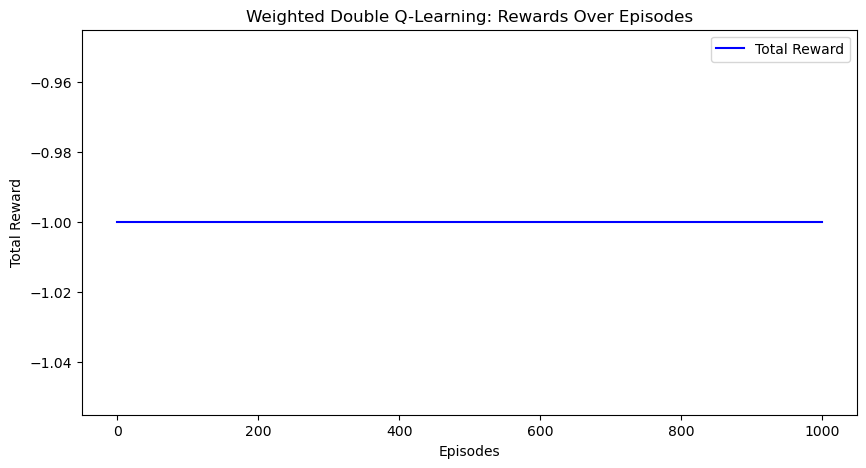

In [10]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Frozen Lake environment
class FrozenLakeEnv:
    def __init__(self):
        self.grid = [
            ['S', 'F', 'F', 'F'],
            ['F', 'H', 'F', 'H'],
            ['F', 'F', 'F', 'H'],
            ['H', 'F', 'F', 'G']
        ]
        self.state_size = 16  # 4x4 grid
        self.action_size = 4  # 0: Left, 1: Down, 2: Right, 3: Up
        self.start_state = (0, 0)
        self.current_state = self.start_state

    def reset(self):
        self.current_state = self.start_state
        return self._state_to_index(self.current_state)

    def step(self, action):
        x, y = self.current_state

        if action == 0:  # Left
            y = max(0, y - 1)
        elif action == 1:  # Down
            x = min(3, x + 1)
        elif action == 2:  # Right
            y = min(3, y + 1)
        elif action == 3:  # Up
            x = max(0, x - 1)

        self.current_state = (x, y)

        if self.grid[x][y] == 'H':
            return self._state_to_index(self.current_state), -1, True  # Hole
        elif self.grid[x][y] == 'G':
            return self._state_to_index(self.current_state), 1, True  # Goal
        else:
            return self._state_to_index(self.current_state), 0, False  # Frozen tile

    def _state_to_index(self, state):
        return state[0] * 4 + state[1]

# Define the Weighted Double Q-Learning agent
class WeightedDoubleQLearningAgent:
    def __init__(self, action_size, alpha=0.1, gamma=0.9, c=1.0):
        self.QA = [0] * 16  # Q-values for agent A
        self.QB = [0] * 16  # Q-values for agent B
        self.action_size = action_size
        self.alpha = alpha
        self.gamma = gamma
        self.c = c

    def choose_action(self, state):
        if random.uniform(0, 1) < 0.5:
            return self._epsilon_greedy(self.QA, state)
        else:
            return self._epsilon_greedy(self.QB, state)

    def _epsilon_greedy(self, Q, state):
        epsilon = 0.1  # Exploration rate
        if random.uniform(0, 1) < epsilon:
            return random.randint(0, self.action_size - 1)  # Explore
        return max(range(self.action_size), key=lambda a: Q[state])  # Exploit

    def update(self, state, action, reward, next_state):
        if random.uniform(0, 1) < 0.5:
            a_star = max(range(self.action_size), key=lambda a: self.QA[next_state])
            a_L = min(range(self.action_size), key=lambda a: abs(self.QB[next_state] - self.QB[a_star]))
            beta_A = self.c + abs(self.QB[next_state] - self.QB[a_L])
            delta_A = reward + self.gamma * (beta_A * self.QA[next_state] + (1 - beta_A) * self.QB[next_state]) - self.QA[state]
            self.QA[state] += self.alpha * delta_A
        else:
            a_star = max(range(self.action_size), key=lambda a: self.QB[next_state])
            a_L = min(range(self.action_size), key=lambda a: abs(self.QA[next_state] - self.QA[a_star]))
            beta_B = self.c + abs(self.QA[next_state] - self.QA[a_L])
            delta_B = reward + self.gamma * (beta_B * self.QB[next_state] + (1 - beta_B) * self.QA[next_state]) - self.QB[state]
            self.QB[state] += self.alpha * delta_B

# Training the agent
def train_agent(episodes):
    env = FrozenLakeEnv()
    agent = WeightedDoubleQLearningAgent(env.action_size)
    rewards_per_episode = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False
        
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            agent.update(state, action, reward, next_state)
            state = next_state
            total_reward += reward
        
        rewards_per_episode.append(total_reward)

    return rewards_per_episode

# Plotting the results
def plot_rewards(rewards):
    plt.figure(figsize=(10, 5))
    plt.title("Weighted Double Q-Learning: Rewards Over Episodes")
    plt.xlabel("Episodes")
    plt.ylabel("Total Reward")
    sns.lineplot(data=rewards, label='Total Reward', color='blue')
    plt.legend()
    plt.show()

# Run training and plotting
if __name__ == "__main__":
    episodes = 1000
    rewards = train_agent(episodes)
    plot_rewards(rewards)




## Online Connectionist Q-Learning Algorithm

In order to represent the Q-function, Lin [163] chose to use one neural network for each action, which avoids the hidden nodes receiving conflicting error signals from different outputs. The neural network weights are updated by:

$$
w_{t+1} = w_t + \eta r_t + \gamma \max_{a \in A} (Q_{t+1} - Q_t) \nabla_w Q_t \tag{6.19.9}
$$

where:
- $ \eta $ is the learning constant,
- $ r_t $ is the payoff received for the transition from state $ x_t $ to $ x_{t+1} $,
- $ Q_t = Q(x_t, a_t) $,
- $ \nabla_w Q_t $ is a vector of the output gradients $ \frac{\partial Q_t}{\partial w_t} $ calculated by backpropagation.

Rummery and Niranjan [218] proposed an alternative update algorithm, called modified connectionist Q-learning. This algorithm is based more strongly on temporal difference and uses the following update rule:

$$
\Delta w_t = \eta \left( r_t + \gamma Q_{t+1} - Q_t \right) \sum_{k=0}^{t} (\gamma \lambda)^{t-k} \nabla_w Q_k \tag{6.19.10}
$$

This update rule is different from the normal Q-learning in the use of the $ Q_{t+1} $ associated with the action selected instead of the greedy $ \max_{a \in A} Q_{t+1} $.

## Gradient Calculation

To calculate the gradient $ \nabla_w Q_t $, we define a backpropagation neural network as a collection of interconnected units arranged in layers. Let $ i, j, $ and $ k $ refer to different neurons in the network, with error signals propagating from right to left, as shown in Fig. 4.

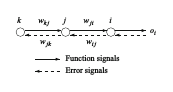

Fig.4 One neural network as a collection of interconnected units, where i, j , and k are neurons in output layer, hidden layer, and input layer, respectively .


Letting $ w_{ij} $ be a weight on a connection from layer $ i $ to $ j $, the output from layer $ i $ is given by:

$$
o_i = f(\sigma_i) \tag{6.19.11}
$$

where $ \sigma_i = \sum_{j} w_{ij} o_j $ and $ f(\sigma) $ is a sigmoid function. The output gradient with respect to the output layer weights $ w_{ij} $ is defined as:

$$
\frac{\partial o_i}{\partial w_{ij}} = \frac{\partial f(\sigma_i)}{\partial \sigma_i} \cdot \frac{\partial \sigma_i}{\partial w_{ij}} = f'(\sigma_i) o_j \tag{6.19.12}
$$

where $ f'(\sigma_i) = \frac{\partial f}{\partial \sigma}(\sigma_i) $ is the first-order derivative of the sigmoid function $ f(\sigma_i) $.

The gradient of the output $ o_i $ with respect to the hidden layer weights $ w_{jk} $ is given by:

$$
\frac{\partial o_i}{\partial w_{jk}} = \frac{\partial f(\sigma_i)}{\partial \sigma_i} \cdot \frac{\partial \sigma_i}{\partial o_j} \cdot \frac{\partial o_j}{\partial \sigma_j} \cdot \frac{\partial \sigma_j}{\partial w_{jk}} = f'(\sigma_i) \cdot w_{ij} \cdot f'(\sigma_j) \cdot o_k \tag{6.19.13}
$$

## Modified Connectionist Q-Learning Algorithm

The modified connectionist Q-learning algorithm is shown in Algorithm 2.

**Algorithm 2: Modified Connectionist Q-Learning Algorithm **
1. **Initialization**: Reset all eligibilities $ e_0 = 0 $ and put $ t = 0 $.
2. **Repeat**:
    3. Select action $ a_t $.
    4. If $ t > 0 $,
    5. $ w_t = w_{t-1} + \eta(r_{t-1} + Q_t - Q_{t-1}) e_{t-1} $.
    6. Calculate $ \nabla_w Q_t $ with respect to selected action $ a_t $ only.
    7. $ e_t = \nabla_w Q_t + \gamma \lambda e_{t-1} $.
    8. Perform action $ a_t $ and receive the payoff $ r_t $.
    9. If the trial has not ended, $ t \leftarrow t + 1 $ and go to Step 3.
10. **Until End**
11. **Output**: $ Q_t $.


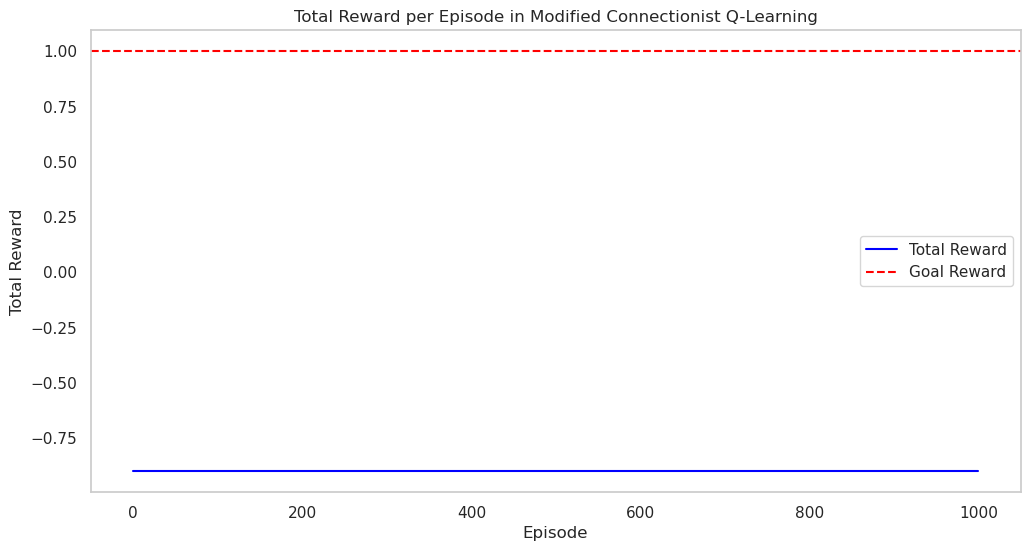

In [11]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Constants
N_ACTIONS = 4  # Number of possible actions
N_STATES = 10  # Number of states
N_EPISODES = 1000  # Number of training episodes
GAMMA = 0.9  # Discount factor
ETA = 0.1  # Learning rate
LAMBDA = 0.9  # Eligibility trace decay
c = 0.1  # Constant for beta calculation

# Initialize Q-values for each action in each state
Q = [[0 for _ in range(N_ACTIONS)] for _ in range(N_STATES)]
eligibility_traces = [[0 for _ in range(N_ACTIONS)] for _ in range(N_STATES)]
reward_history = []

def get_reward(state, action):
    """Define a simple reward function for the environment."""
    if state == N_STATES - 1:  # If the agent reaches the last state
        return 1  # Positive reward
    return -0.1  # Small penalty for each action

def select_action(state):
    """Select an action using epsilon-greedy policy."""
    if random.random() < 0.1:  # Epsilon for exploration
        return random.randint(0, N_ACTIONS - 1)
    return Q[state].index(max(Q[state]))  # Greedy action

# Main Q-Learning loop
for episode in range(N_EPISODES):
    state = 0  # Start at the first state
    total_reward = 0
    
    while state < N_STATES - 1:  # Until reaching the goal state
        action = select_action(state)
        reward = get_reward(state, action)
        total_reward += reward
        
        # Update eligibility traces
        eligibility_traces[state][action] += 1
        
        # Calculate the temporal difference
        next_state = state + 1  # Simple next state logic for demo
        delta = reward + GAMMA * Q[next_state][select_action(next_state)] - Q[state][action]
        
        # Update weights
        for s in range(N_STATES):
            for a in range(N_ACTIONS):
                Q[s][a] += ETA * delta * eligibility_traces[s][a]
                # Update eligibility traces
                eligibility_traces[s][a] *= GAMMA * LAMBDA
        
        state = next_state
    
    reward_history.append(total_reward)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(N_EPISODES), reward_history, label='Total Reward', color='blue')
plt.title('Total Reward per Episode in Modified Connectionist Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.axhline(1, color='red', linestyle='--', label='Goal Reward')
plt.legend()
plt.grid()
plt.show()


## Q-Learning with Experience Replay

Reinforcement learning is known to be unstable and can even diverge when a nonlinear function approximator such as a neural network is used to represent the action-value, i.e., Q function. This instability has a few causes:

- The correlations present in the sequence of observations.
- Small updates to $ Q $ may significantly change the policy and therefore change the data distribution.
- The correlation between the action-value $ Q $ and the target value $ r + \max_{a'} Q(s', a') $.

To deal with these instabilities, a novel variant of Q-learning was developed by Mnih et al. which uses two key ideas:

1. A biologically inspired mechanism termed **experience replay** is used, which randomizes over the data, thereby removing correlations in the observation sequence and smoothing over changes in the data distribution.
2. An iterative update is used for adjusting the action-values $ Q $ towards target values that are only periodically updated, thereby reducing correlations with the target.

To generate the experience replay, an approximate value function $ Q(s, a; \theta_i) $ is first parameterized, where $ \theta_i $ are the parameters (that is, weights) of the Q-network at iteration $ i $. Then, the agent’s experiences $ e_t = (s_t, a_t, r_t, s_{t+1}) $ are stored at each time-step $ t $ in a dataset $ D_t = \{ e_1, \ldots, e_t \} $ to perform experience replay. 

## Algorithm 2: Deep Q-learning with Experience Replay

1. **Initialization**:
   1.1 replay memory $ D $ to capacity $ N $,  
   1.2 action-value function $ Q $ with random weights $ \theta $,  
   1.3 target action-value function $ \hat{Q} $ with weights $ \theta^- = \theta $.  
   
2. For $ \text{episode} = 1, M $ do:
   3. Initialize sequence $ s_1 = \{ x_1 \} $ and preprocessed sequence $ \phi_1 = \phi(s_1) $.
   4. For $ t = 1, T $ do:
      5. With probability $ \epsilon $ select a random action $ a_t $,  
      6. otherwise select $ a_t = \arg\max_{a} Q(\phi(s_t), a; \theta) $.
      7. Execute action $ a_t $ in emulator and observe reward $ r_t $ and image $ x_{t+1} $.
      8. Set $ s_{t+1} = s_t, a_t, x_{t+1} $ and preprocess $ \phi_{t+1} = \phi(s_{t+1}) $.
      9. Store transition $ (\phi_t, a_t, r_t, \phi_{t+1}) $ in $ D $.
      10. Sample random mini-batch of transitions $ (\phi_j, a_j, r_j, \phi_{j+1}) $ from $ D $.
          - $ r_j $, if episode terminates at step $ j + 1 $;  
      11. Set 
          $$
          y_j = \begin{cases}
          r_j + \gamma \max_{a'} \hat{Q}(\phi_{j+1}, a'; \theta) & \text{if episode continues} \\
          r_j & \text{otherwise}
          \end{cases}
          $$
      12. Perform a gradient descent step on $ y_j - Q(\phi_j, a_j; \theta) $ with respect to the network parameters $ \theta $.
      13. Every $ C $ steps reset $ \hat{Q} = Q $.
   14. End for
15. End for

During learning, Q-learning updates are applied on samples (or mini-batches) of experience $ (s, a, r, s') \sim U(D) $, drawn uniformly at random from the pool of stored samples. The Q-learning update at iteration $ i $ uses the following loss function:

$$
L_i(\theta_i) = \mathbb{E}_{(s,a,r,s') \sim U(D)} \left[ r + \gamma \max_{a'} Q(s', a'; \theta_i^-) - Q(s, a; \theta_i) \right]
$$

where $ \gamma $ is the discount factor determining the agent’s horizon, $ \theta_i $ are the parameters of the Q-network at iteration $ i $, and $ \theta_i^- $ are the network parameters used to compute the target at iteration $ i $. The target network parameters $ \theta_i^- $ are only updated with the Q-network parameters $ \theta_i $ every $ C $ steps and are held fixed between individual updates.


In [ ]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seed for reproducibility
random.seed(42)

# Define the environment
class GridWorld:
    def __init__(self, size=4):
        self.size = size
        self.state_space = size * size
        self.actions = ['up', 'down', 'left', 'right']
        self.reset()

    def reset(self):
        self.agent_pos = [0, 0]  # Starting position at the top-left corner
        self.goal_pos = [3, 3]    # Goal position at the bottom-right corner
        self.done = False
        return self.agent_pos

    def step(self, action):
        if self.done:
            raise Exception("Episode has ended. Please reset the environment.")
        
        if action == 'up' and self.agent_pos[0] > 0:
            self.agent_pos[0] -= 1
        elif action == 'down' and self.agent_pos[0] < self.size - 1:
            self.agent_pos[0] += 1
        elif action == 'left' and self.agent_pos[1] > 0:
            self.agent_pos[1] -= 1
        elif action == 'right' and self.agent_pos[1] < self.size - 1:
            self.agent_pos[1] += 1

        reward = 1 if self.agent_pos == self.goal_pos else -0.01  # Small penalty for each step
        self.done = self.agent_pos == self.goal_pos
        return self.agent_pos, reward, self.done

# Define the Q-Learning agent with Experience Replay
class QLearningAgent:
    def __init__(self, state_space, action_space, memory_size=1000, batch_size=32, epsilon=0.1, gamma=0.99, alpha=0.1):
        self.state_space = state_space
        self.action_space = action_space
        self.memory = []
        self.memory_size = memory_size
        self.batch_size = batch_size
        self.epsilon = epsilon
        self.gamma = gamma
        self.alpha = alpha
        self.Q = [[0.0 for _ in range(action_space)] for _ in range(state_space)]  # Q-table

    def choose_action(self, state):
        if random.random() < self.epsilon:
            return random.choice(range(self.action_space))  # Explore
        else:
            state_index = state[0] * 4 + state[1]
            return self.Q[state_index].index(max(self.Q[state_index]))  # Exploit

    def store_experience(self, experience):
        if len(self.memory) >= self.memory_size:
            self.memory.pop(0)  # Remove oldest experience
        self.memory.append(experience)

    def replay(self):
        if len(self.memory) < self.batch_size:
            return  # Not enough memory to sample from
        mini_batch = random.sample(self.memory, self.batch_size)

        for state, action, reward, next_state, done in mini_batch:
            state_index = state[0] * 4 + state[1]
            next_state_index = next_state[0] * 4 + next_state[1]

            target = reward + (self.gamma * max(self.Q[next_state_index]) if not done else 0)
            self.Q[state_index][action] += self.alpha * (target - self.Q[state_index][action])

# Training the agent
def train_agent(episodes=1000):
    env = GridWorld()
    agent = QLearningAgent(state_space=16, action_space=4)  # 4 actions: up, down, left, right
    rewards = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        
        while True:
            action = agent.choose_action(state)
            action_index = action  # Get the action index directly
            next_state, reward, done = env.step(action_index)
            agent.store_experience((state, action_index, reward, next_state, done))
            agent.replay()  # Experience replay
            state = next_state
            total_reward += reward
            
            if done:
                break

        rewards.append(total_reward)

    return rewards

# Run training and plot results
reward_list = train_agent(episodes=1000)

# Plotting results
plt.figure(figsize=(10, 6))
sns.lineplot(data=reward_list, label='Total Rewards per Episode')
plt.title('Training Rewards Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.legend()
plt.show()
